In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()

### Loading Data

In [2]:
data_csv = pd.read_csv('/content/coronavirus_dataset.csv')
data_csv.head()

,Province.State,Country.Region,Lat,Long,date,cases,type
0,NaN,Afghanistan,33.0,65.0,2020-01-22,0,confirmed
1,NaN,Afghanistan,33.0,65.0,2020-01-23,0,confirmed
2,NaN,Afghanistan,33.0,65.0,2020-01-24,0,confirmed
3,NaN,Afghanistan,33.0,65.0,2020-01-25,0,confirmed
4,NaN,Afghanistan,33.0,65.0,2020-01-26,0,confirmed


In [3]:
conf_data = data_csv[data_csv.type == 'confirmed']
sum_confirmed_gb_date = conf_data.groupby('date').agg({'cases' : 'sum'})
sum_confirmed_gb_date.head()

,cases
date,
2020-01-22,555
2020-01-23,98
2020-01-24,288
2020-01-25,493
2020-01-26,684


In [4]:
death_data = data_csv[data_csv.type == 'death']
sum_deaths_gb_date = death_data.groupby('date').agg({'cases': 'sum'})
sum_deaths_gb_date.head()

,cases
date,
2020-01-22,17
2020-01-23,1
2020-01-24,8
2020-01-25,16
2020-01-26,14


### Plotting Data

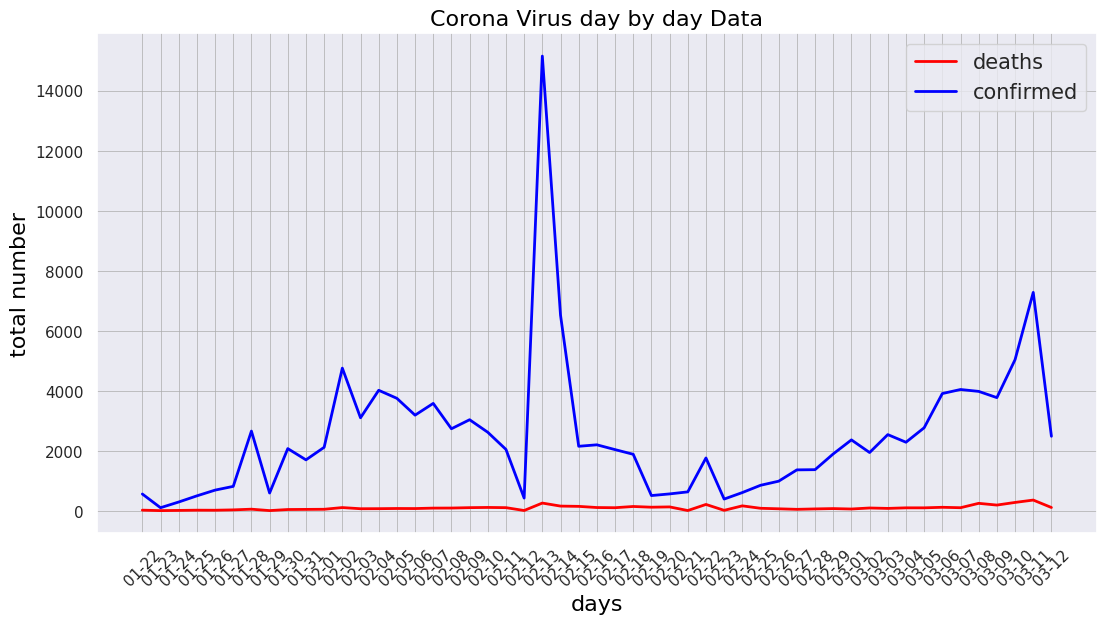

In [5]:
days = [d.split('-')[1]+'-'+d.split('-')[2] for d in list(sum_deaths_gb_date.index)]
deaths = sum_deaths_gb_date.cases
confirmed = sum_confirmed_gb_date.cases

%matplotlib inline
fig= plt.figure(figsize=(20,10),facecolor='white', edgecolor='black',)
axes= fig.add_axes([0.5,0.5,0.5,0.5])
font = {'color' : 'black', 'size' : 16}
axes.plot(days , deaths, color='red' , label ='deaths',lw = 2,)
axes.plot(days , confirmed, color='blue' , label = 'confirmed' ,lw = 2)
plt.xlabel('days' , font)
plt.ylabel('total number', font)
plt.title('Corona Virus day by day Data',font)
plt.xticks(rotation=45)
plt.grid(color='#ababab', linestyle='-', linewidth=0.5)
axes.legend(prop={'size' : 15})

### Log Curve

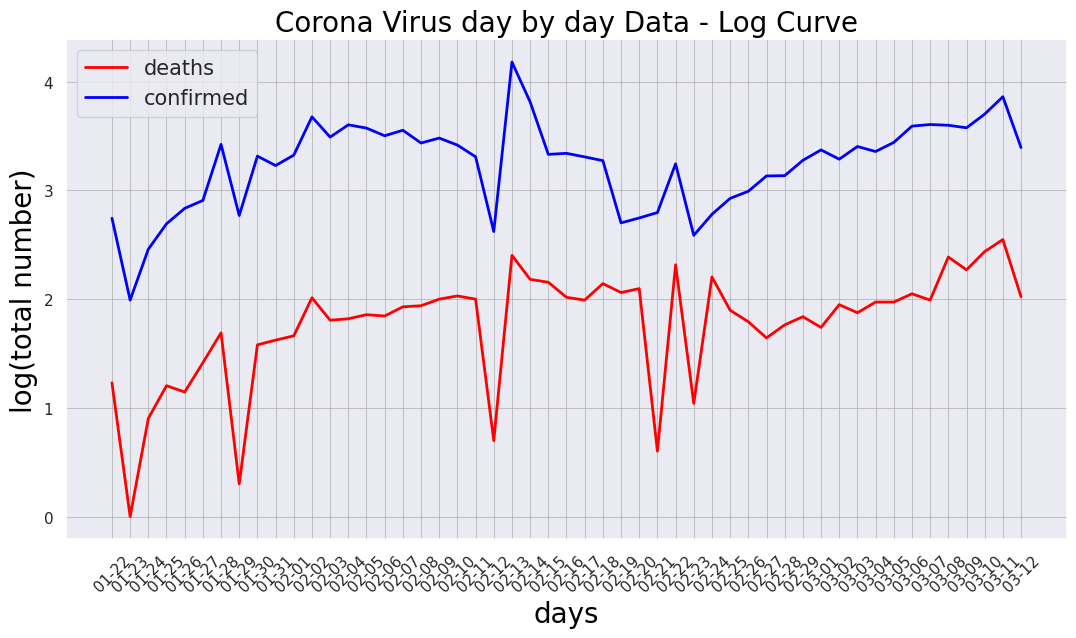

In [6]:

deaths_log = np.log10(deaths)
confirmed_log = np.log10(confirmed)

fig= plt.figure(figsize=(20,10),facecolor='white', edgecolor='black',)
axes= fig.add_axes([0.5,0.5,0.5,0.5])
font = {'color' : 'black', 'size' : 20}
axes.plot(days , deaths_log, color='red' , label ='deaths',lw = 2,)
axes.plot(days , confirmed_log, color='blue' , label = 'confirmed' ,lw = 2)
plt.xlabel('days' , font)
plt.ylabel('log(total number)', font)
plt.title('Corona Virus day by day Data - Log Curve',font)
plt.xticks(rotation=45)
plt.grid(color='#ababab', linestyle='-', linewidth=0.5)
axes.legend(prop={'size' : 15})

Correlation Coeficient
resemblance between death rate and infection rate

In [7]:
coef = np.corrcoef(deaths,confirmed)
print(coef)

[[1.         0.65446212]
 [0.65446212 1.        ]]



 global infection rate day per day

In [8]:
confirmed_ = np.array(confirmed)
rate =[]
for i in range(1,len(confirmed_)-1):
    today = confirmed_[i]
    tomorrow = confirmed[i+1]
    rate.append(tomorrow-today)

In [9]:
# list of all days till date
days = days[1:len(days)-1]

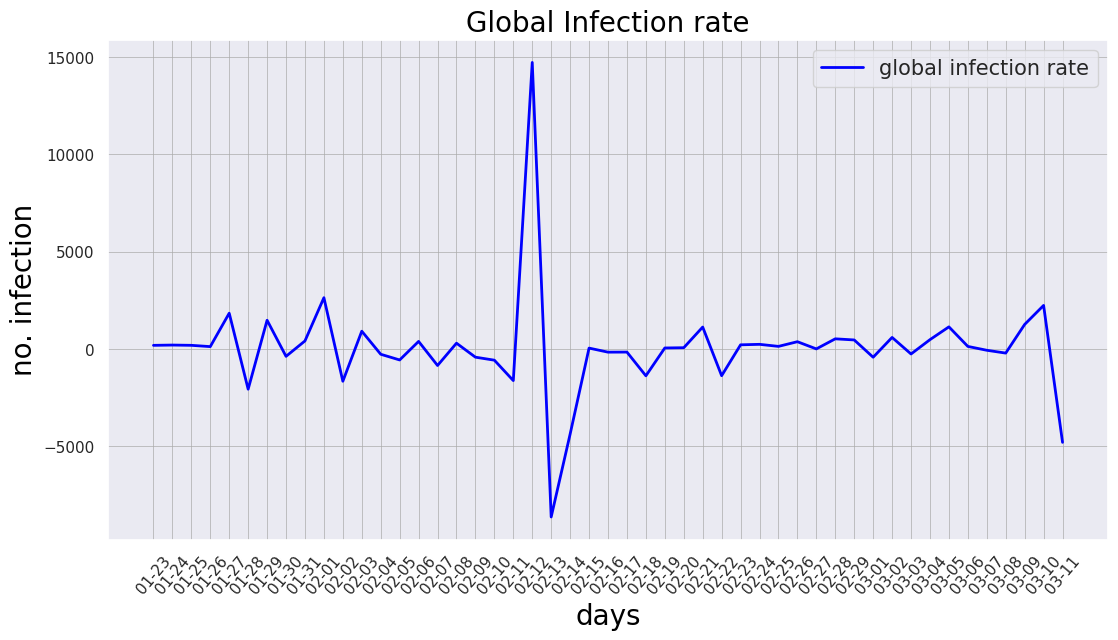

In [10]:
fig= plt.figure(figsize=(20,10),facecolor='white', edgecolor='black',)
axes= fig.add_axes([0.5,0.5,0.5,0.5])

axes.plot(days , rate , lw = 2 , color='blue' , label = 'global infection rate')
plt.xlabel('days' , font)
plt.ylabel('no. infection', font)
plt.title('Global Infection rate' , font)
plt.xticks(rotation=50)
plt.grid(color='#ababab', linestyle='-', linewidth=0.5)
axes.legend(prop={'size' : 15})


 rate of death everyday in the whole world

In [11]:
death_rate =[]
for i in range(1,len(deaths)-1):
    today = deaths[i]
    tomorrow = deaths[i+1]
    death_rate.append(tomorrow-today)


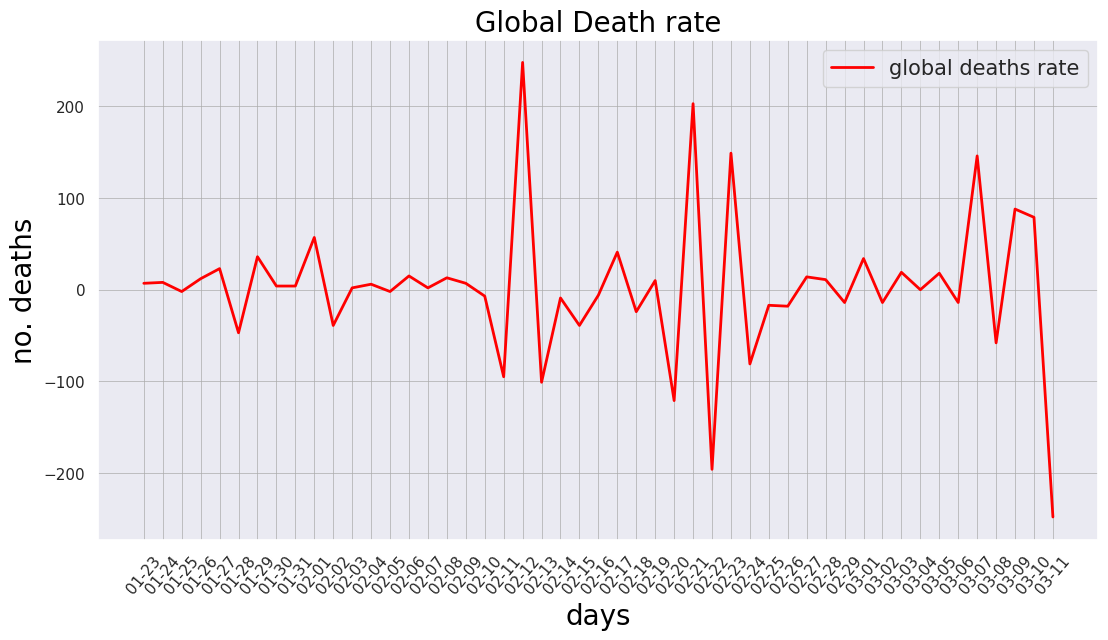

In [12]:
fig= plt.figure(figsize=(20,10),facecolor='white', edgecolor='black',)
axes= fig.add_axes([0.5,0.5,0.5,0.5])

axes.plot(days , death_rate , lw = 2 , color='red',label = 'global deaths rate')
plt.xlabel('days' , font)
plt.ylabel('no. deaths', font)
plt.title('Global Death rate' , font)
plt.xticks(rotation=50)
plt.grid(color='#ababab', linestyle='-', linewidth=0.5)
axes.legend(prop={'size' : 15})